# Import the libraries

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

# Import the data

In [2]:
dataset = pd.read_csv('hmnist_28_28_RGB.csv')
dataset = dataset.sample(dataset.shape[0]).to_numpy()
dataset.shape

(10015, 2353)

# Preprocess and split the data

In [3]:
images = dataset[:,:-1]
images = np.reshape(images, (images.shape[0], 28, 28, 3), order='C')
images = images/256.0
labels = dataset[:,-1]
images.shape, labels.shape

((10015, 28, 28, 3), (10015,))

In [4]:
split = int(labels.shape[0]*0.8)
train_images = images[:split]
test_images = images[split:]
train_labels = labels[:split]
test_labels = labels[split:]
train_images.shape, test_images.shape, train_labels.shape, test_labels.shape

((8012, 28, 28, 3), (2003, 28, 28, 3), (8012,), (2003,))

# Show images

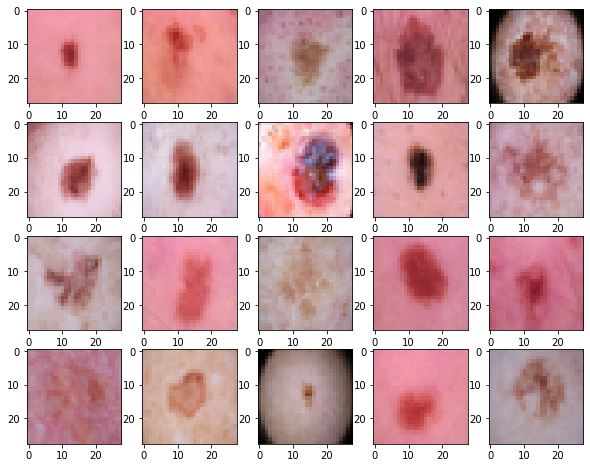

In [5]:
plt.figure(figsize=(10,8))
for i in range(20):
  plt.subplot(4, 5, i+1)
  plt.imshow(train_images[i])
plt.show()

# Build and compile the model

In [6]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)),
                             tf.keras.layers.MaxPooling2D((2,2)),

                             tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D((2,2)),

                             tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D((2,2)),

                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation='relu'),
                             tf.keras.layers.Dense(7)
])
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='Adam', metrics='accuracy')

# Train the model

In [7]:
num_epochs = 50
history = model.fit(train_images, train_labels, epochs=num_epochs, validation_data=(test_images, test_labels), verbose=0)

# Show the model accuracy

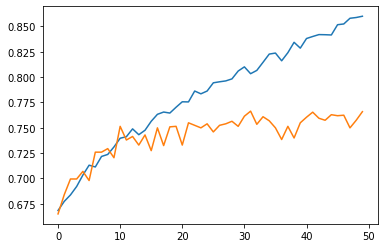

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# Show the model predictions

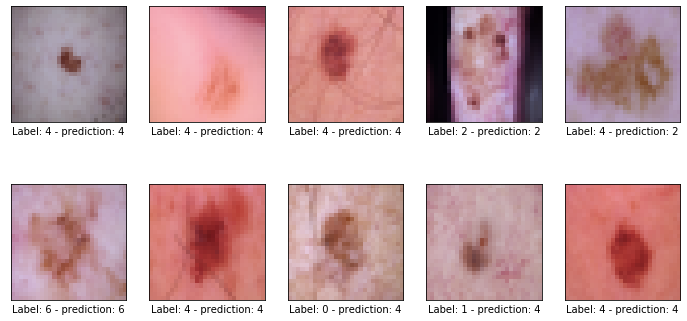

In [9]:
classes = model.predict(test_images)
plt.figure(figsize=(12,6))
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(test_images[i])
  plt.xticks([])
  plt.yticks([])
  plt.xlabel('Label: ' + str(test_labels[i]) + ' - prediction: ' + str(np.argmax(classes[i])))